In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import numpy as np
from probabilistic_regression_tools.utils import plot_quantile_forecast
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from probabilistic_regression_tools.probmdl import QuantileForecastWrapper
from probabilistic_regression_tools.scores import crps_for_quantiles

In [17]:
def sigmoid(x, noise=0.2):
    return (1/(1+np.exp(-x)) + np.random.uniform(size=x.shape)*noise).ravel()*5

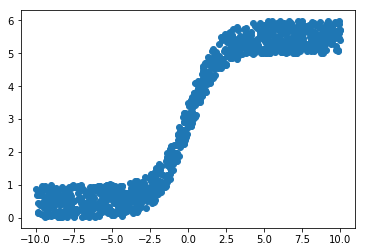

In [18]:
x = np.random.uniform(low=-10, high=10, size=(1000,1))
y = sigmoid(x)
plt.scatter(x,y.ravel())
plt.show()

In [19]:
gbr = GradientBoostingRegressor(loss='quantile', n_estimators=100)

qf = QuantileForecastWrapper(estimators=gbr, include_one_quantile=False, include_zero_quantile=False)

qf = qf.fit(x,y)
pred = qf.predict_proba(x)
crps_for_quantiles(pred, y, qf._quantiles_including_zero_and_one_quantile_padding())[0]

0.092205878696047502

In [20]:
gbr = GradientBoostingRegressor(loss='quantile', n_estimators=50)

qf = QuantileForecastWrapper(estimators=gbr, include_one_quantile=True, include_zero_quantile=False)

qf = qf.fit(x,y)
pred = qf.predict_proba(x)
crps_for_quantiles(pred, y, qf._quantiles_including_zero_and_one_quantile_padding())[0]

0.095982381595075023

In [21]:
gbr = GradientBoostingRegressor(loss='quantile', n_estimators=50)

qf = QuantileForecastWrapper(estimators=gbr, include_one_quantile=False, include_zero_quantile=True)

qf = qf.fit(x,y)
pred = qf.predict_proba(x)
crps_for_quantiles(pred, y, qf._quantiles_including_zero_and_one_quantile_padding())[0]

0.095982381595075023

In [22]:
gbr = GradientBoostingRegressor(loss='quantile', n_estimators=50)

qf = QuantileForecastWrapper(estimators=gbr, include_one_quantile=True, include_zero_quantile=True)

qf = qf.fit(x,y)
pred = qf.predict_proba(x)
crps_for_quantiles(pred, y, qf._quantiles_including_zero_and_one_quantile_padding())[0]

0.095982381595075023

In [23]:
x_t = (x * np.ones_like(pred))
qs = qf._quantiles_including_zero_and_one_quantile_padding()

In [24]:
qf.score(x,y)

0.095982381595075023

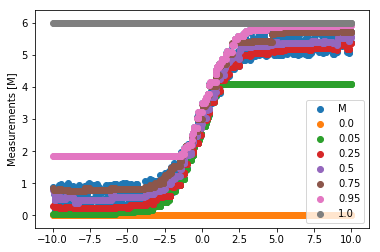

In [25]:
plot_quantile_forecast(x,y,pred,qs)